In [5]:
from matplotlib import pyplot as plt
import numpy as np

In [6]:
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from matplotlib import font_manager as fm
class FontManager:
    """Utility to load fun fonts from https://fonts.google.com/ for matplotlib.

    Find a nice font at https://fonts.google.com/, and then get its corresponding URL
    from https://github.com/google/fonts/

    Use like:

    fm = FontManager()
    fig, ax = plt.subplots()

    ax.text("Good content.", fontproperties=fm.prop, size=60)
    """

    def __init__(self, github_url):
        """
        Lazily download a font.

        Parameters
        ----------
        github_url : str
            Can really be any .ttf file, but probably looks like
            "https://github.com/google/fonts/blob/master/ofl/cinzel/Cinzel-Regular.ttf?raw=True"
        """
        self.github_url = github_url
        self._prop = None

    @property
    def prop(self):
        """Get matplotlib.font_manager.FontProperties object that sets the custom font."""
        if self._prop is None:
            with NamedTemporaryFile(delete=False, suffix=".ttf") as temp_file:
                temp_file.write(urlopen(self.github_url).read())
                self._prop = fm.FontProperties(fname=temp_file.name)
        return self._prop
font = FontManager("https://github.com/google/fonts/blob/master/ofl/imfellgreatprimersc/IMFeGPsc28P.ttf?raw=True")
font.prop.set_size(32)

cursive = FontManager("https://github.com/google/fonts/blob/master/ofl/italianno/Italianno-Regular.ttf?raw=True")
cursive.prop.set_size(42)

In [32]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: maximum fitness
3: top fitness (best fitness ever)
4: peak fitness (fitness earned with best single weight value by max individual)
5: median # of nodes in population
6: median # of connections in population]
"""
neat = np.loadtxt('swingup_neat_stats.out', delimiter=',')
neat384 = np.loadtxt('swingup_neat384_stats.out', delimiter=',')
wann = np.loadtxt('swingup_wann_stats.out', delimiter=',')
# runTime = np.loadtxt('log/sample_runTime.out', delimiter=',') 

Text(0.5,1,'Comparison Run of NEAT and WANN on Cart-Pole Swing-Up')

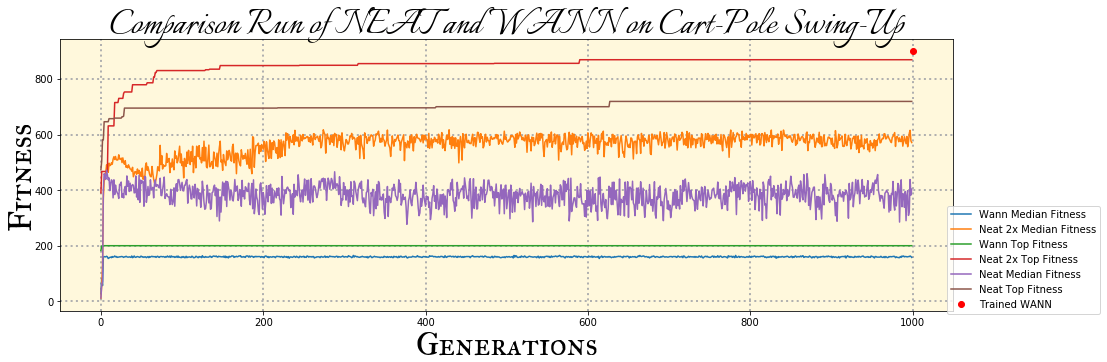

In [33]:
# Plot fitness progress:
ax, fig = plt.subplots(figsize=(16,5))
fig.set_facecolor('cornsilk')
fig.grid(linestyle='--', linewidth=0.1)
fig.plot(wann[:1000,1], label="Wann Median Fitness")
fig.plot(neat384[:1000,1], label="Neat 2x Median Fitness")
# fig.plot(wann[:100,2], label="Wann Max Fitness")
fig.plot(wann[:1000,3], label="Wann Top Fitness")
fig.plot(neat384[:1000,3], label="Neat 2x Top Fitness")
# fig.plot(wann[:100,4], label="Wann Peak Fitness")
fig.plot(neat[:1000,1], label="Neat Median Fitness")
# fig.plot(neat[:100,2], label="Neat Max Fitness")
fig.plot(neat[:1000,3], label="Neat Top Fitness")
# fig.plot(neat[:100,4], label="Neat Peak Fitness")
fig.plot(1000, 900, 'ro', label='Trained WANN')
fig.legend(loc='lower right', bbox_to_anchor=(1.17, -0.03))
fig.grid(linestyle=':', linewidth=2)
plt.xlabel('Generations', fontproperties=font.prop)
plt.ylabel('Fitness', fontproperties=font.prop)

# Approximate time on 8 cores
# genKey = np.array([32,128,256,384,640,896],dtype=int)

# for i in range(len(genKey)):
#   gen = int(genKey[i]/8)-1
#   time = runTime[gen]/3600
#   plt.annotate(str(round(time,1))+' hours', xy=(gen*8,0), xytext=(gen*8,-200),
#                arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

plt.title('Comparison Run of NEAT and WANN on Cart-Pole Swing-Up', fontproperties=cursive.prop)